<a href="https://colab.research.google.com/github/ven7sg/DS-3001-project-voting/blob/main/Project3_model%26VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ven7sg/DS-3001-project-voting.git

fatal: destination path 'DS-3001-project-voting' already exists and is not an empty directory.


In [2]:
#!rm -r DS-3001-project-voting

In [3]:
!pip3 install mapclassify

In [4]:
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [5]:
cdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/county_final.csv') # Load county adjacency data and population data
vdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/voting_final.csv') # Load historical voting data

In [ ]:
gdf = gpd.read_file('/content/drive/My Drive/Colab Notebooks/va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/county_final.csv') # Load county adjacency data and population data
vdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/voting_final.csv') # Load historical voting data
merged = pd.read_csv('/content/DS-3001-project-voting/cleaned data/merged_final.csv') #merged cdf and vdf

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='county_fips')  # merge county population and adjacency data into df


In [6]:
nhgis_county_data=gpd.read_file('/content/DS-3001-project-voting/data/0002_ds250_20205_county_M.csv')
nhgis_county_data

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,AM8FM032,AM8FM033,AM8FM034,AM8FM035,AM8FM036,AM8FM037,AM8FM038,AM8FM039,AM9SM001,geometry
0,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,County Subdivision Code,...,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over,Female: 75 years and over: With a disability,Female: 75 years and over: No disability,Gini Index,None
1,G0100010,2016-2020,AL,,,Alabama,01,Autauga County,001,,...,347,373,84,164,140,130,184,178,0.0326,None
2,G0100030,2016-2020,AL,,,Alabama,01,Baldwin County,003,,...,625,604,113,443,448,154,475,436,0.0119,None
3,G0100050,2016-2020,AL,,,Alabama,01,Barbour County,005,,...,154,182,2,87,87,41,99,99,0.0252,None
4,G0100070,2016-2020,AL,,,Alabama,01,Bibb County,007,,...,172,198,125,144,159,149,160,147,0.0408,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,G7201450,2016-2020,PR,,,Puerto Rico,72,Vega Baja Municipio,145,,...,317,320,20,205,207,25,203,208,0.0172,None
3218,G7201470,2016-2020,PR,,,Puerto Rico,72,Vieques Municipio,147,,...,104,280,2,44,44,20,117,117,0.0509,None
3219,G7201490,2016-2020,PR,,,Puerto Rico,72,Villalba Municipio,149,,...,215,215,27,131,131,24,108,103,0.0764,None
3220,G7201510,2016-2020,PR,,,Puerto Rico,72,Yabucoa Municipio,151,,...,159,159,6,157,157,3,130,130,0.0251,None


In [7]:
#nhgis county data cleaning (Carol Wu)
virginia_data = nhgis_county_data[nhgis_county_data['STATE'] == 'Virginia']

#remove YEAR STUSAB REGIONA DIVISIONA STATE STATEA (all VA 2016-2020)
for col in virginia_data.columns:
    if len(virginia_data[col].unique()) == 1:
        virginia_data.drop(col,inplace=True,axis=1)
#select nativity, poverty status by sex, gini index of income ineuqality col
VAcounty_data = virginia_data[['COUNTY','AM0KM002','AM0KM003','AM0KM004','AM0KM005','AM0KM006','AM63M003','AM63M017','AM63M032','AM63M046','AM9SM001']]

<ipython-input-7-5425893d7840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-7-5425893d7840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-7-5425893d7840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-7-5425893d7840>:7: SettingWithCopyWarning: 
A value 

In [8]:
column_mapping = {
    'COUNTY' : 'county',
    'AM0KM002': 'U.S. citizen, born in the United States',
    'AM0KM003': 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
    'AM0KM004': 'U.S. citizen, born abroad of American parent(s)',
    'AM0KM005': 'U.S. citizen by naturalization',
    'AM0KM006': 'Not a U.S. citizen',
    'AM63M003': 'Income in the past 12 months below poverty level: Male',
    'AM63M017': 'Income in the past 12 months below poverty level: Female',
    'AM63M032': 'Income in the past 12 months at or above poverty level: Male',
    'AM63M046':  'Income in the past 12 months at or above poverty level: Female',
    'AM9SM001':   'Gini Index'
}

# Rename the columns
VAcounty_data = VAcounty_data.rename(columns=column_mapping)

In [9]:
VAcounty_data

,county,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island Areas","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,Income in the past 12 months below poverty level: Male,Income in the past 12 months below poverty level: Female,Income in the past 12 months at or above poverty level: Male,Income in the past 12 months at or above poverty level: Female,Gini Index
2822,Accomack County,541,125,113,295,481,548,477,579,509,0.0194
2823,Albemarle County,936,250,299,626,615,578,713,797,809,0.0150
2824,Alleghany County,121,20,96,45,57,205,305,259,296,0.0287
2825,Amelia County,142,20,122,105,80,263,225,257,267,0.0416
2826,Amherst County,190,68,77,132,93,386,358,389,364,0.0211
...,...,...,...,...,...,...,...,...,...,...,...
2950,Suffolk city,665,198,416,283,387,576,671,566,709,0.0178
2951,Virginia Beach city,1982,741,647,1302,1421,1292,1678,1424,1756,0.0104
2952,Waynesboro city,278,42,175,158,260,412,406,426,514,0.0466
2953,Williamsburg city,333,34,98,183,252,222,236,257,273,0.0633


In [10]:
vdf20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data
Dvotes = vdf20.loc[(vdf20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
Rvotes = vdf20.loc[(vdf20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')

Dvotes_index = Dvotes.index
FIP = Dvotes_index.tolist()
print(FIP)
VAcounty_data['county_fips'] = FIP
VAcounty_data = VAcounty_data.merge(Dvotes,left_on='county_fips',right_on='county_fips') #for mapping
VAcounty_data = VAcounty_data.merge(Rvotes,left_on='county_fips',right_on='county_fips') #for mapping
print(VAcounty_data)

[51001, 51003, 51005, 51007, 51009, 51011, 51013, 51015, 51017, 51019, 51021, 51023, 51025, 51027, 51029, 51031, 51033, 51035, 51036, 51037, 51041, 51043, 51045, 51047, 51049, 51051, 51053, 51057, 51059, 51061, 51063, 51065, 51067, 51069, 51071, 51073, 51075, 51077, 51079, 51081, 51083, 51085, 51087, 51089, 51091, 51093, 51095, 51097, 51099, 51101, 51103, 51105, 51107, 51109, 51111, 51113, 51115, 51117, 51119, 51121, 51125, 51127, 51131, 51133, 51135, 51137, 51139, 51141, 51143, 51145, 51147, 51149, 51153, 51155, 51157, 51159, 51161, 51163, 51165, 51167, 51169, 51171, 51173, 51175, 51177, 51179, 51181, 51183, 51185, 51187, 51191, 51193, 51195, 51197, 51199, 51510, 51520, 51530, 51540, 51550, 51570, 51580, 51590, 51595, 51600, 51610, 51620, 51630, 51640, 51650, 51660, 51670, 51678, 51680, 51683, 51685, 51690, 51700, 51710, 51720, 51730, 51735, 51740, 51750, 51760, 51770, 51775, 51790, 51800, 51810, 51820, 51830, 51840]
                  county U.S. citizen, born in the United States  \


Numeric only - Training RMSE: 11688.851784811943 R-squared: 0.8653497223766042
Numeric only - Testing RMSE: 11649.134239328654 R-squared: 0.5730196158883043


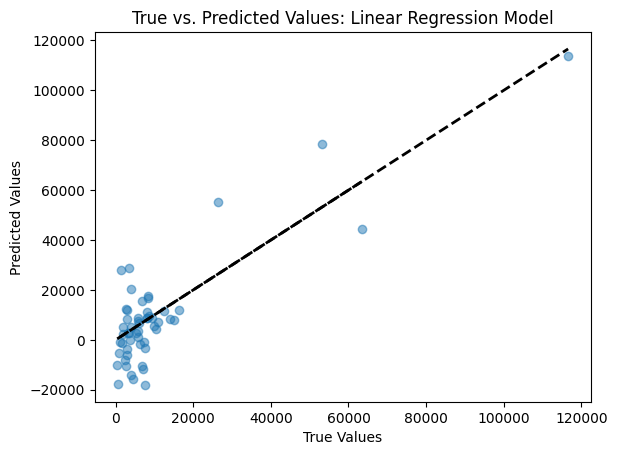

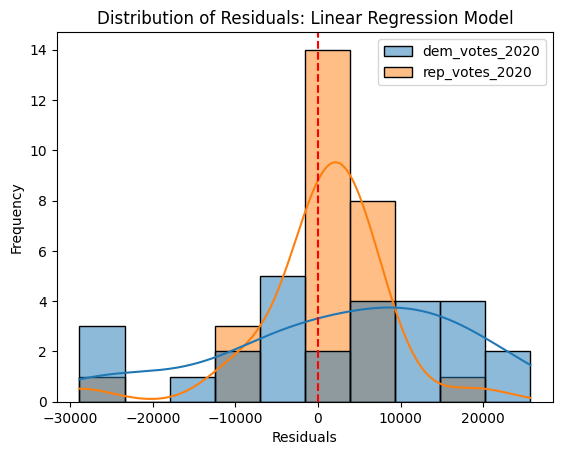

In [11]:
# Numeric variables, Linear Regression, Residuals using Polynomial Features (Carol Wu)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

#vars = VAcounty_data.columns.tolist()
#print(vars)
numeric_vars = ['U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'U.S. citizen, born abroad of American parent(s)', 'U.S. citizen by naturalization', 'Not a U.S. citizen', 'Income in the past 12 months below poverty level: Male', 'Income in the past 12 months below poverty level: Female', 'Income in the past 12 months at or above poverty level: Male', 'Income in the past 12 months at or above poverty level: Female', 'Gini Index']

#cast to numeric value
for var in numeric_vars:
    VAcounty_data[var] = pd.to_numeric(VAcounty_data[var], errors='coerce')

# Linear regression model with numeric vars only
X_numeric = VAcounty_data[numeric_vars]
y = VAcounty_data[['dem_votes_2020','rep_votes_2020']]
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
linear_reg_numeric = LinearRegression()
linear_reg_numeric.fit(X_train_numeric, y_train)

# Predict on training and test data
y_train_pred_numeric = linear_reg_numeric.predict(X_train_numeric)
y_test_pred_numeric = linear_reg_numeric.predict(X_test_numeric)

# RMSE and R-squared for training and test sets
train_rmse_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
test_rmse_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))
train_r2_numeric = r2_score(y_train, y_train_pred_numeric)
test_r2_numeric = r2_score(y_test, y_test_pred_numeric)
print('Numeric only - Training RMSE:', train_rmse_numeric, 'R-squared:', train_r2_numeric)
print('Numeric only - Testing RMSE:', test_rmse_numeric, 'R-squared:', test_r2_numeric)

# Scatter plot for true vs. predicted values
plt.scatter(y_test, y_test_pred_numeric, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values: Linear Regression Model')
plt.show()

# Residuals plot
residuals_poly = y_test - y_test_pred_numeric
sns.histplot(residuals_poly, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals: Linear Regression Model')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()


In [15]:
# Visualize predicted votes in 2024 (Carol Wu)
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')

NameError: name 'df' is not defined

In [12]:
y_pred_numeric = linear_reg_numeric.predict(X_numeric)
y_pred_numeric.shape

(133, 2)

In [13]:

df_pred_votes = pd.DataFrame(y_pred_numeric, columns=['dem_votes_2024', 'rep_votes_2024'])

In [ ]:
df = pd.concat([df, df_pred_votes], axis=1)

<Axes: >

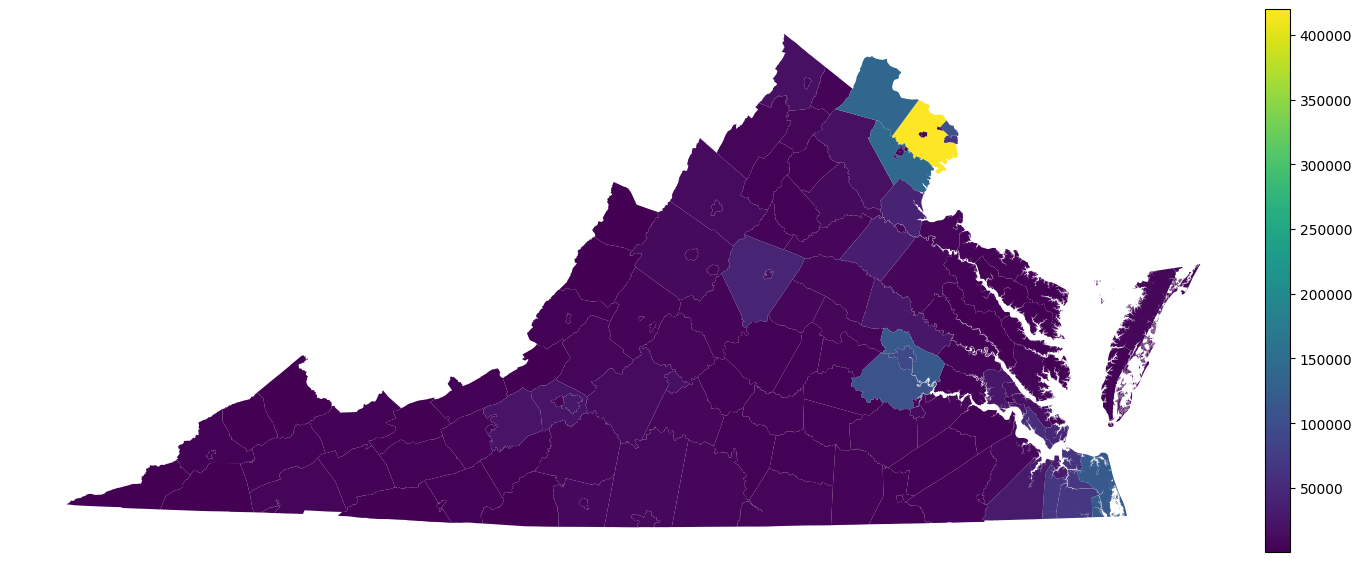

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='dem_votes_2020',legend=True,cax=cax)

<Axes: >

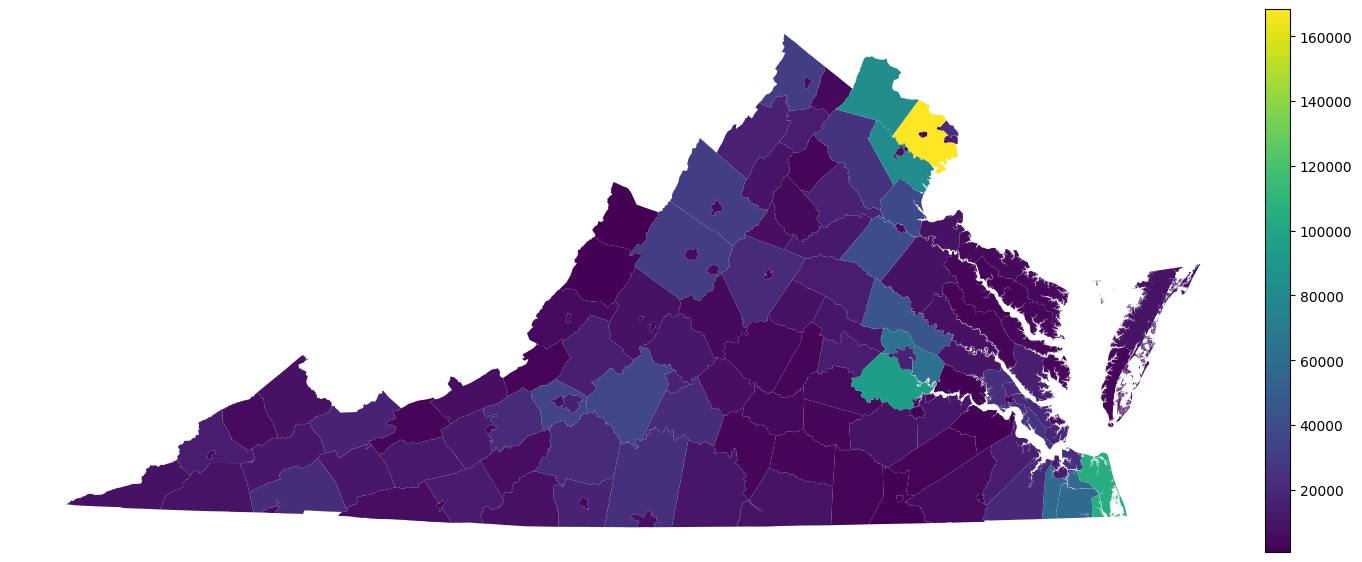

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='rep_votes_2020',legend=True,cax=cax)

<Axes: >

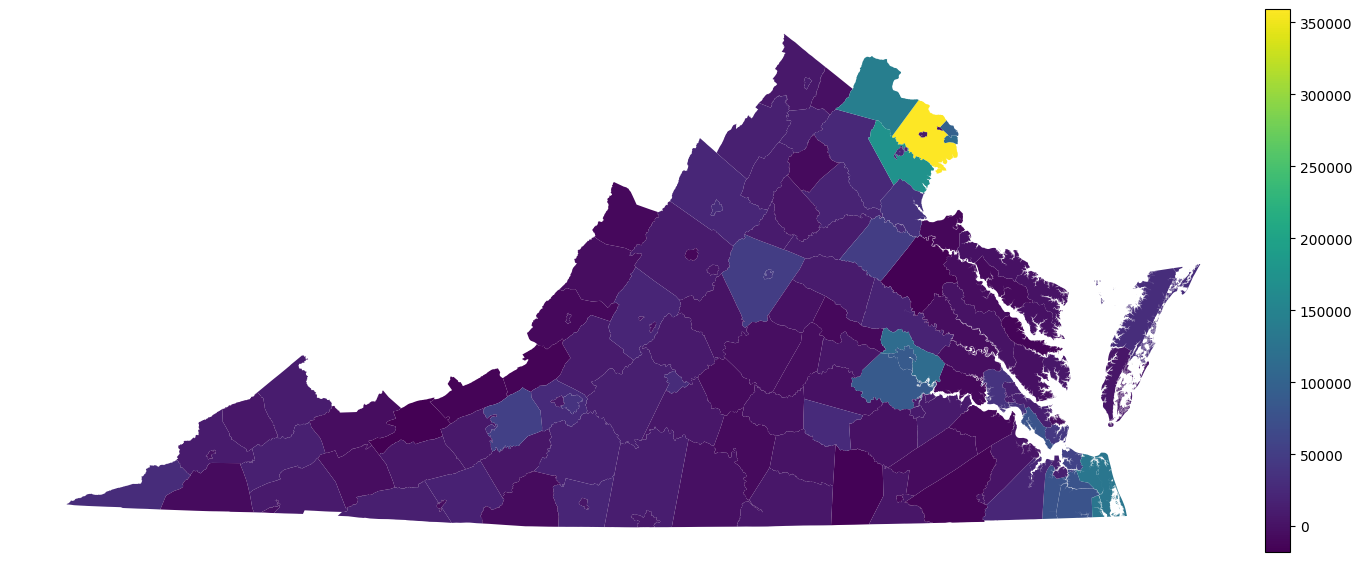

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='dem_votes_2024',legend=True,cax=cax)

<Axes: >

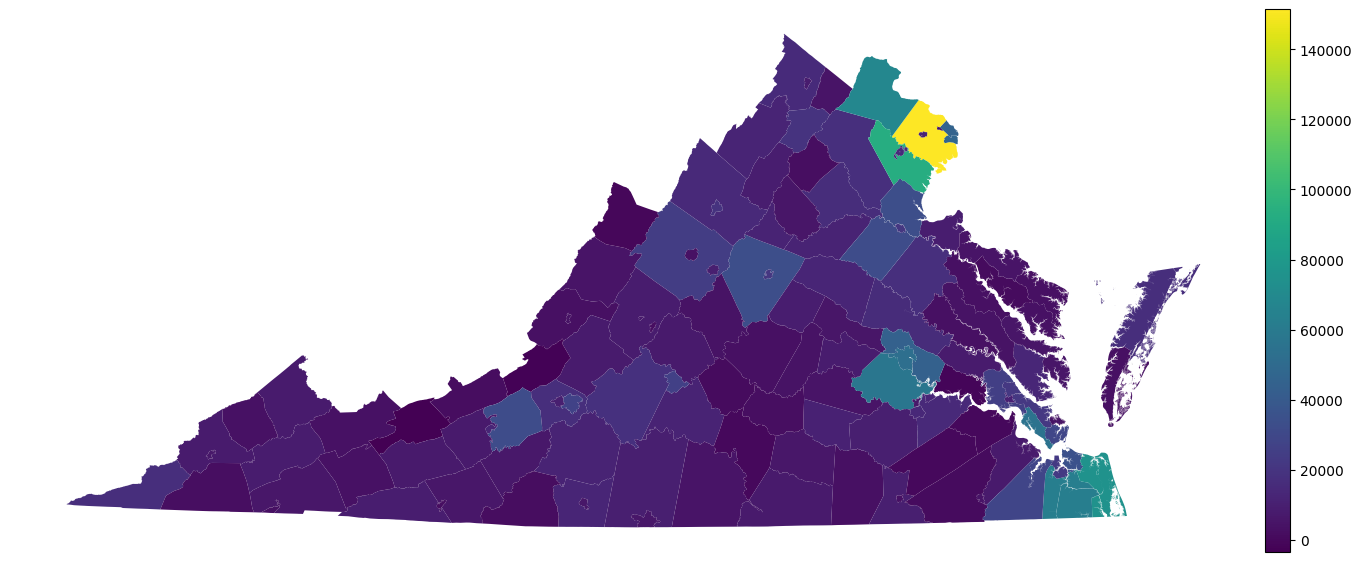

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='rep_votes_2024',legend=True,cax=cax)

In [14]:
#BOOTSTRAPPING (Elle)
VAcounty_data['dem_votes_2024']=df_pred_votes['dem_votes_2024']
VAcounty_data['rep_votes_2024']=df_pred_votes['rep_votes_2024']

In [15]:
N = VAcounty_data.shape[0]

In [16]:
#(Elle)
from sklearn.linear_model import LinearRegression # Import linear regression model

VAcounty_data=VAcounty_data.drop(['county'], axis=1)
y = VAcounty_data['county_fips']
X = VAcounty_data.drop('county_fips',axis=1)
reg0 = LinearRegression().fit(X, y) # Fit the linear model
names = reg0.feature_names_in_
coef = pd.DataFrame({'variable':names,'coefficient':reg0.coef_})

print('Intercept: ' + str(reg0.intercept_)+'\n') # Intercept value
print('R2: ' + str(reg0.score(X, y) )) # R squared measure

coef

Intercept: 51198.56708927557

R2: 0.32419566725178717


,variable,coefficient
0,"U.S. citizen, born in the United States",-0.012019
1,"U.S. citizen, born in Puerto Rico or U.S. Isla...",0.689912
2,"U.S. citizen, born abroad of American parent(s)",0.251456
3,U.S. citizen by naturalization,-0.286103
4,Not a U.S. citizen,0.024338
5,Income in the past 12 months below poverty lev...,-0.121257
6,Income in the past 12 months below poverty lev...,0.593022
7,Income in the past 12 months at or above pover...,-0.378995
8,Income in the past 12 months at or above pover...,0.108430
9,Gini Index,0.000285


In [17]:
#(Elle)
S = 1000
K = len(names)
slopes = np.zeros([S,K])
intercepts = np.zeros(S)
r2s = np.zeros(S)

# Bootstrap:
for s in range(S):
    df_s = VAcounty_data.sample(N,replace=True,axis=0)
    y_s = df_s['county_fips']
    X_s = df_s.drop('county_fips',axis=1)
    #
    reg_s = LinearRegression().fit(X_s, y_s)
    slopes[s,:] = reg_s.coef_.tolist()
    intercepts[s] = reg_s.intercept_
    r2s[s] = reg_s.score(X_s,y_s)

Point Estimate:  0.389430237408488
CI: [0.28648842 0.49427266]


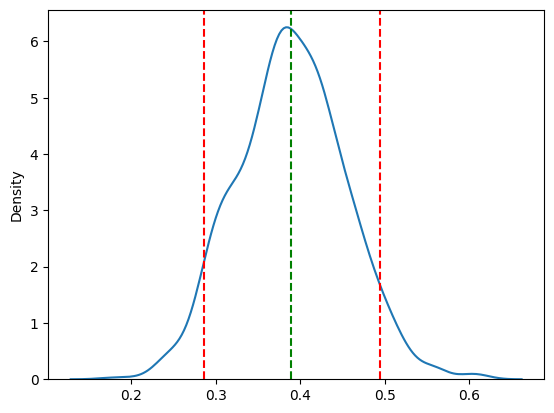

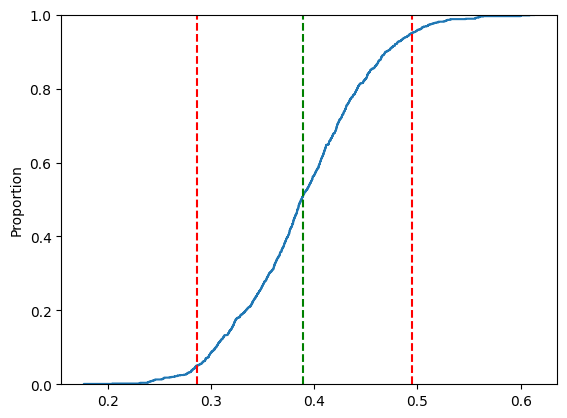

Point Estimate:  51208.77485008545
CI: [51015.11477466 51428.39982755]


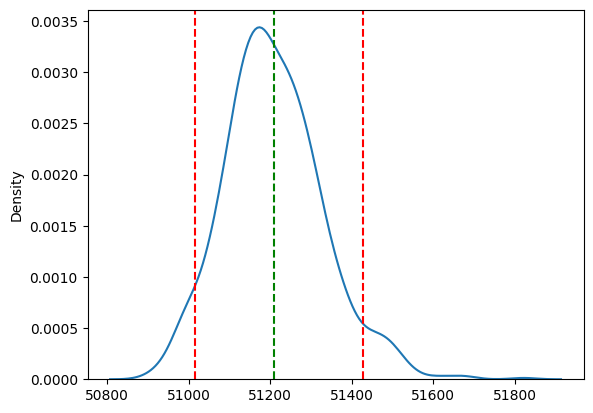

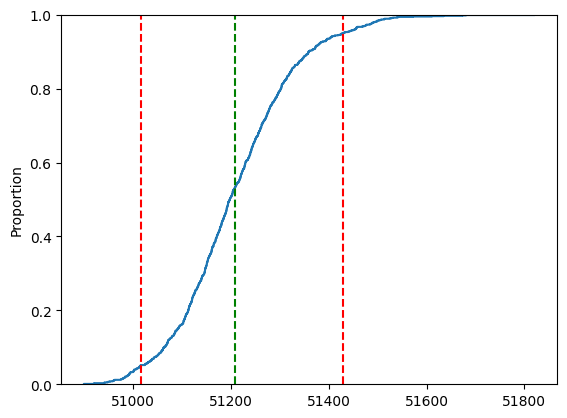

U.S. citizen, born in the United States
Point Estimate:  -0.06275511160488714
CI: [-0.60222124  0.37662688]


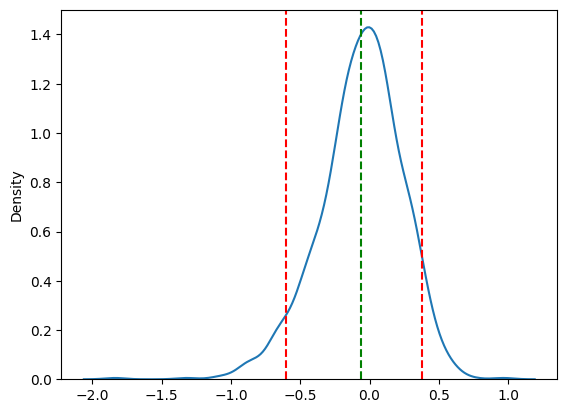

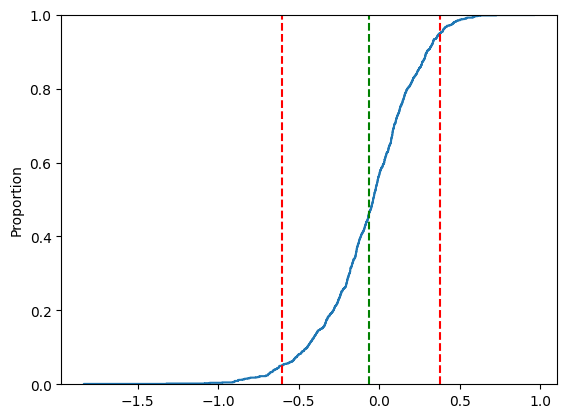

U.S. citizen, born in Puerto Rico or U.S. Island Areas
Point Estimate:  0.6414833078739864
CI: [-0.02246451  1.35933004]


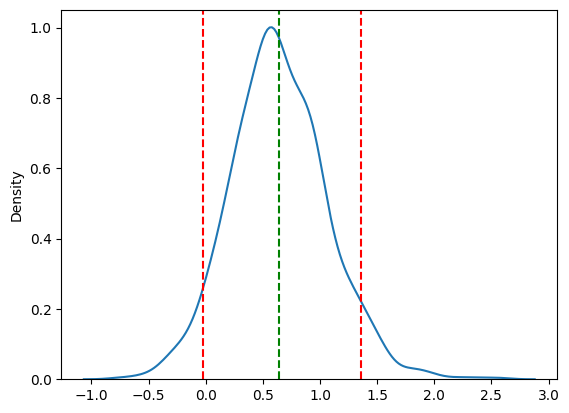

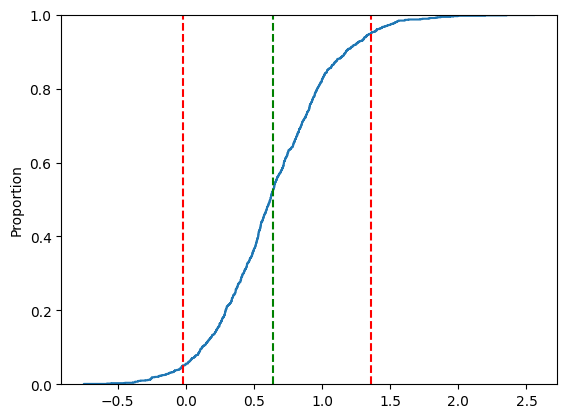

U.S. citizen, born abroad of American parent(s)
Point Estimate:  0.3656517986007452
CI: [-0.7755256   1.61902662]


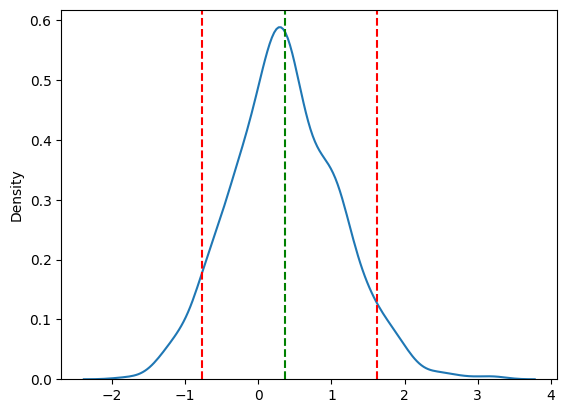

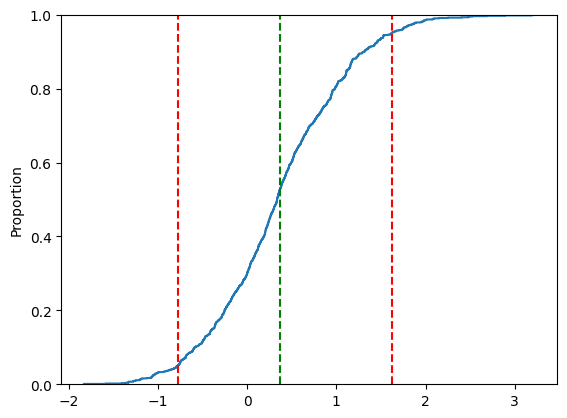

U.S. citizen by naturalization
Point Estimate:  -0.33087322106922634
CI: [-1.39776256  0.69683126]


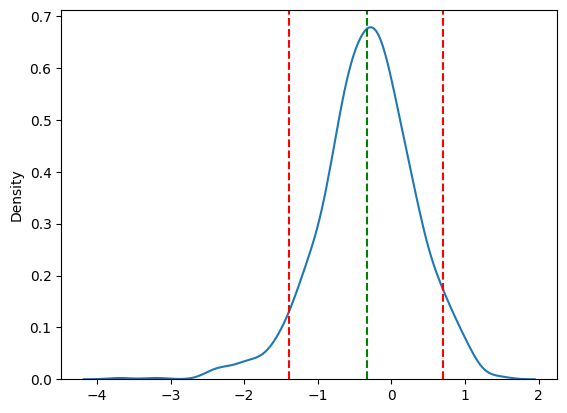

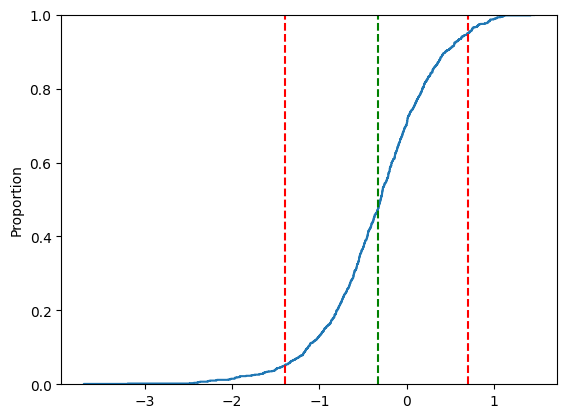

Not a U.S. citizen
Point Estimate:  0.091894151374918
CI: [-0.36609594  0.58912637]


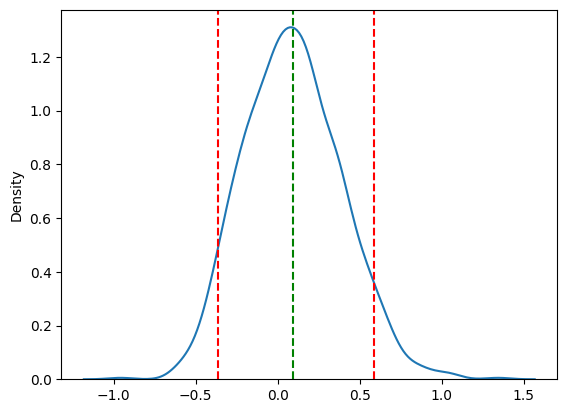

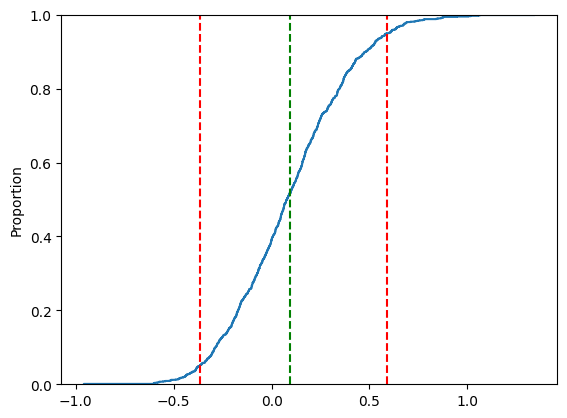

Income in the past 12 months below poverty level: Male
Point Estimate:  -0.19159947286685036
CI: [-1.36930174  0.91318046]


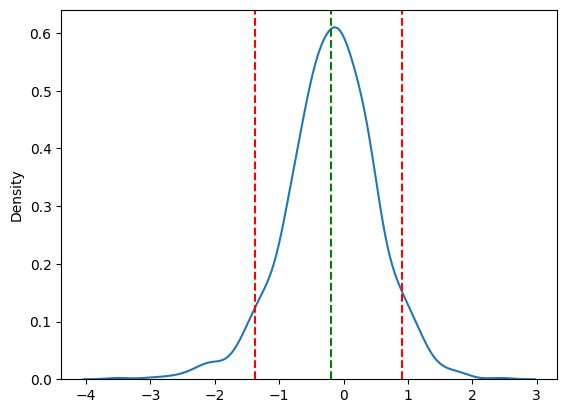

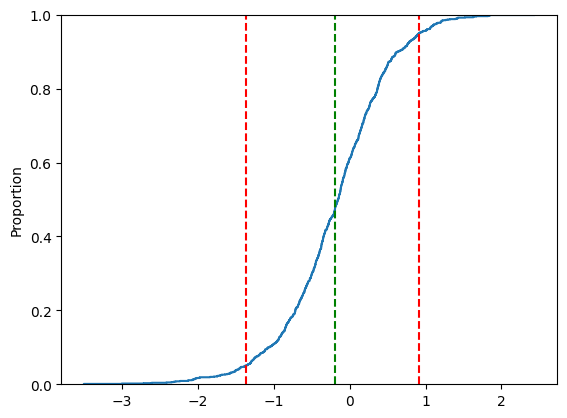

Income in the past 12 months below poverty level: Female
Point Estimate:  0.5521430728065818
CI: [-0.27613889  1.27989928]


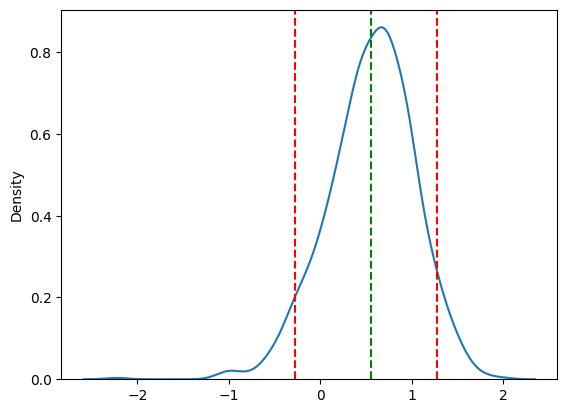

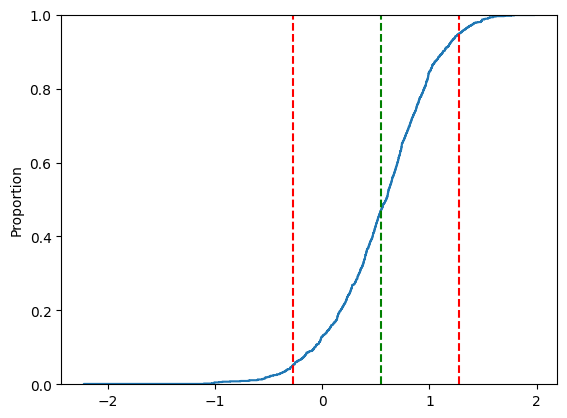

Income in the past 12 months at or above poverty level: Male
Point Estimate:  -0.39723103862407927
CI: [-0.94612407  0.1940407 ]


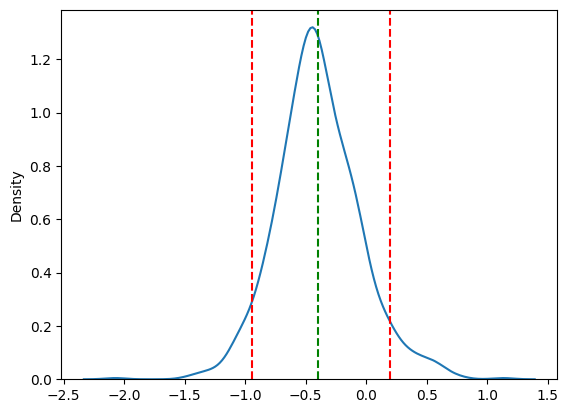

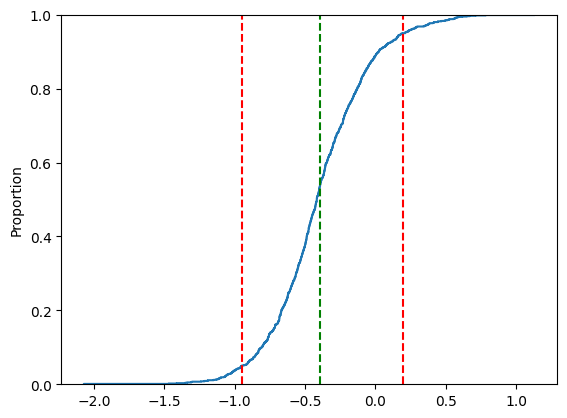

Income in the past 12 months at or above poverty level: Female
Point Estimate:  0.21583070106521224
CI: [-0.70507485  1.30654267]


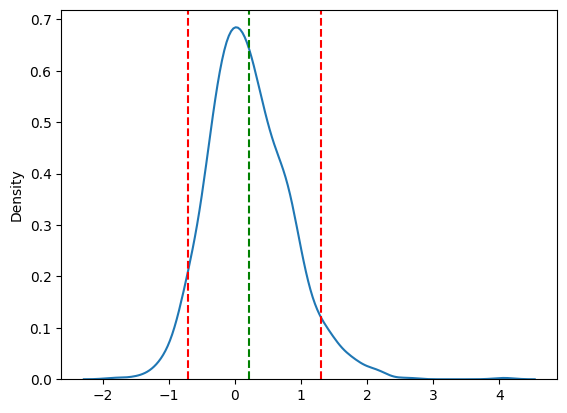

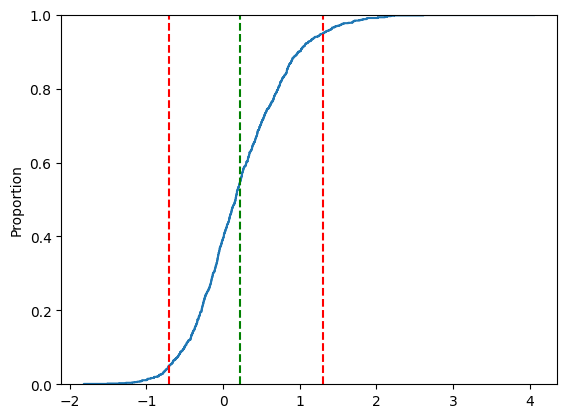

Gini Index
Point Estimate:  0.00046290242571025894
CI: [-0.00157398  0.00263773]


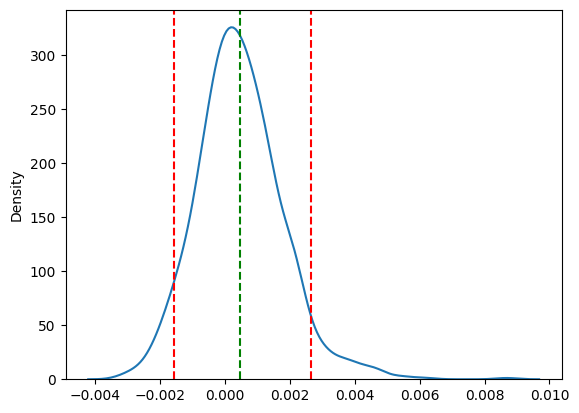

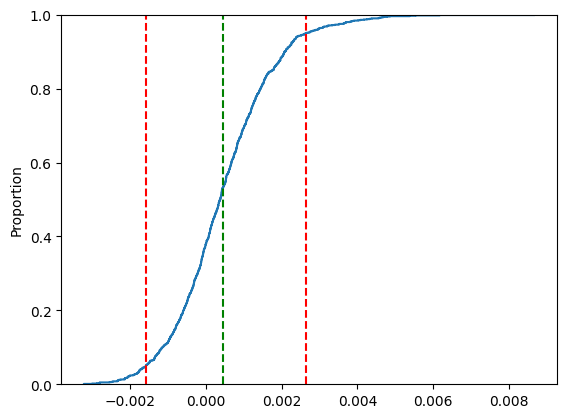

dem_votes_2020
Point Estimate:  -0.000894493331023884
CI: [-0.00643356  0.00325771]


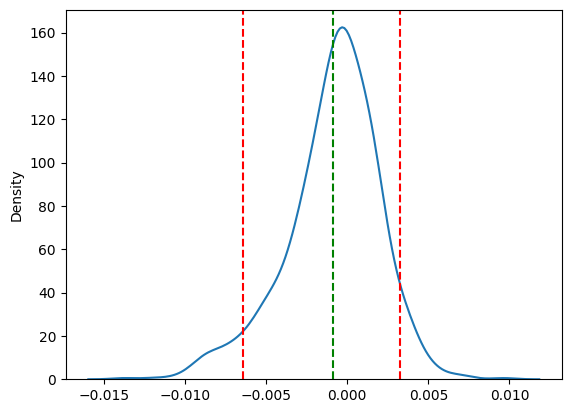

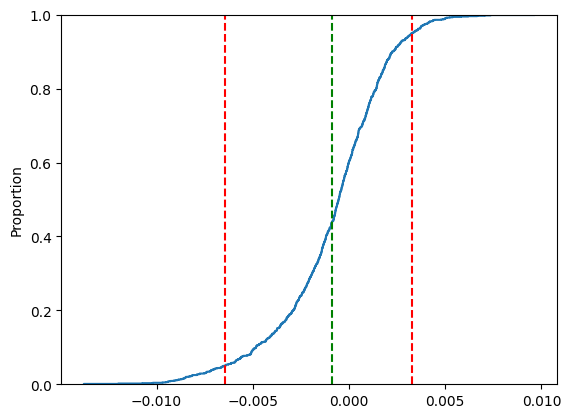

rep_votes_2020
Point Estimate:  -0.01230745259629676
CI: [-0.0179497  -0.00780895]


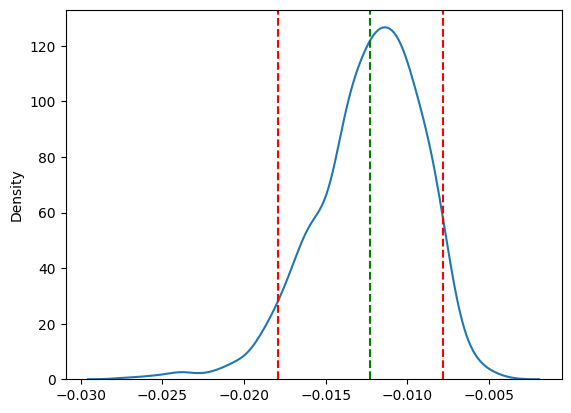

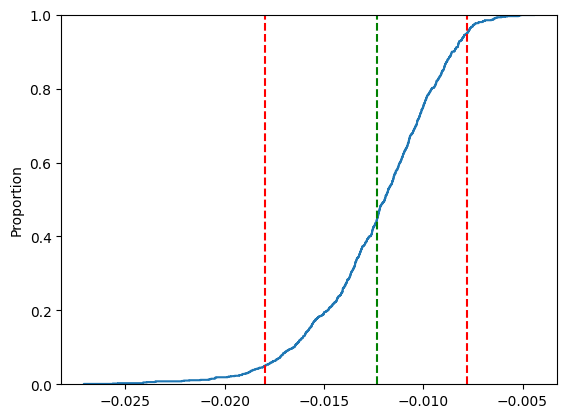

dem_votes_2024
Point Estimate:  0.002776713676808336
CI: [-0.01044391  0.01732107]


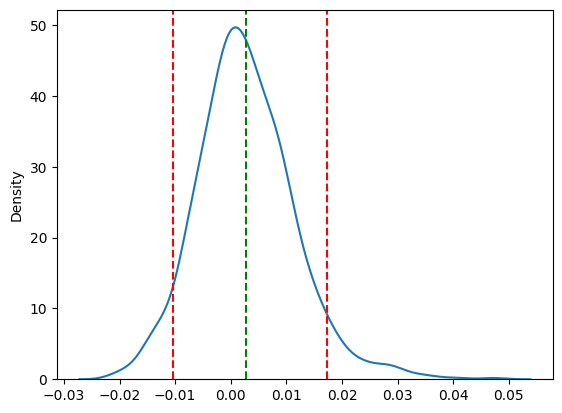

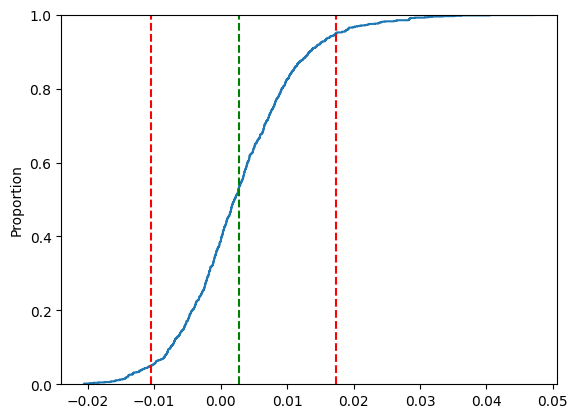

rep_votes_2024
Point Estimate:  0.0026981774345140198
CI: [-0.01468077  0.019392  ]


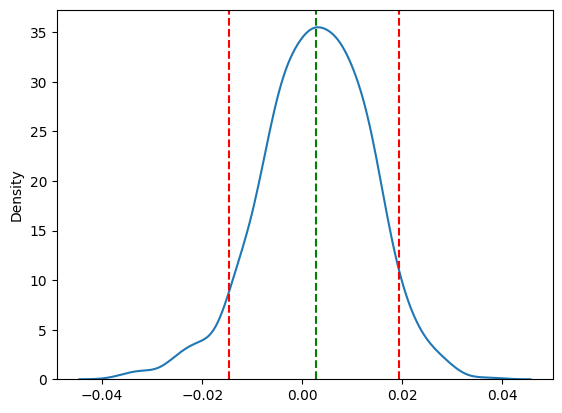

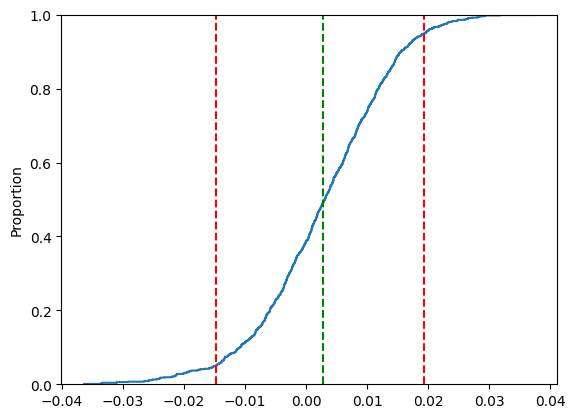

In [18]:
#(Elle)
def CI_eval(var): # Uncertainty analysis for var
    CI = np.quantile(var,[.05,.95]) # Compute 90% CI
    print('Point Estimate: ', var.mean())
    print( 'CI: ' + str(CI) )
    # Density plot of differences in rates, CI:
    ax = sns.kdeplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()
    # ECDF of differences in rates, CI:
    ax = sns.ecdfplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()

CI_eval(r2s)
CI_eval(intercepts)

for k in range(K):
    print(names[k])
    CI_eval(slopes[:,k])